# Handling Categorical Missing Values

Categorical missing values occur when we have missing data in categorical or qualitative variables. These types of missing values need to be handled in a specific way so that they don't affect the analysis or modeling process.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### load dataset

In [2]:
data = pd.read_csv('House Price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

### Check missing values by count and percentage

In [4]:
pd.set_option('display.max_rows',100)
data.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

In [5]:
pd.set_option('display.max_rows',100)
data.isnull().mean().sort_values()

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
LandSlope        0.000000
LandContour      0.000000
LotShape    

<AxesSubplot:>

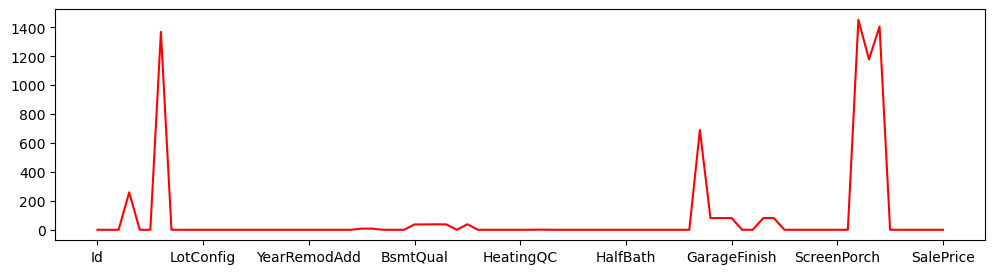

In [6]:
plt.figure(figsize=(12,3))
data.isnull().sum().plot(color='r')

## 1. Dropping Columns

If the proportion of missing values in a variable is very large (usually more than 90%), we may choose to drop the variable entirely. This is because imputing missing values may introduce bias into the data.

In [7]:
data1=data.copy()

In [8]:
data1=data1.drop(columns=data1.columns[(data1.isnull().mean())>=0.90])


In [9]:
print('after dropping: ',data.shape)

after dropping:  (1460, 81)


In [10]:
print('before dropping: ', data1.shape)

before dropping:  (1460, 78)


<AxesSubplot:>

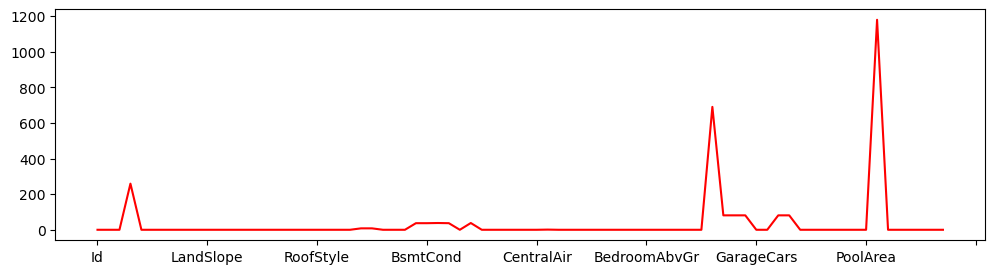

In [11]:
plt.figure(figsize=(12,3))
data1.isnull().sum().plot(color='r')

In [12]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


## 2. Frequent Category Imputation (Mode)

- Then replace missing values with most frequent category / Mode

In [13]:
data2=data1.copy()

In [14]:
for col in data2.columns:
    if data2[col].isnull().mean()<=0.20:
        data2[col].fillna(data2[col].mode()[0],inplace=True)

<AxesSubplot:>

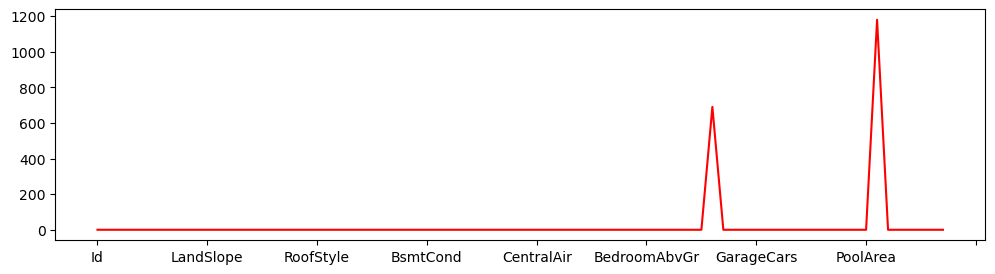

In [15]:
plt.figure(figsize=(12,3))
data2.isnull().sum().plot(color='r')

In [16]:
for col in data2.columns:
    data2[col].fillna(data2[col].mode()[0],inplace=True)

<AxesSubplot:>

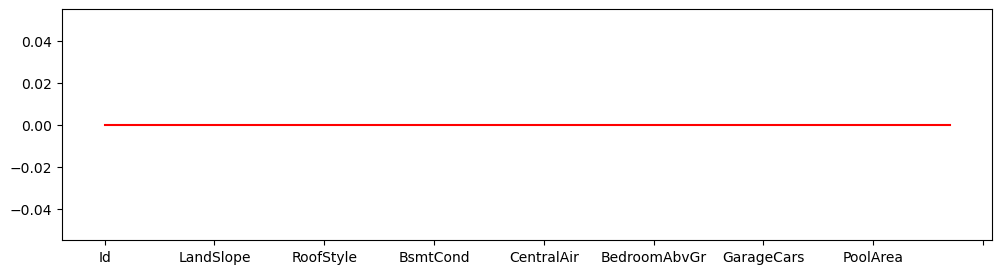

In [17]:
plt.figure(figsize=(12,3))
data2.isnull().sum().plot(color='r')

In [18]:
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,MnPrv,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,MnPrv,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,MnPrv,0,12,2008,WD,Normal,250000


In [19]:
data1.Fence.mode()

0    MnPrv
Name: Fence, dtype: object

## 2. Assigning a New Category

Another method for handling categorical missing values is to assign a new category to the missing values. This is useful in cases where the missing values represent a distinct category.

In [20]:
data3=data1.copy()

In [21]:
for col in data1.columns:
    data3[col].fillna('Unknown', inplace=True)

<AxesSubplot:>

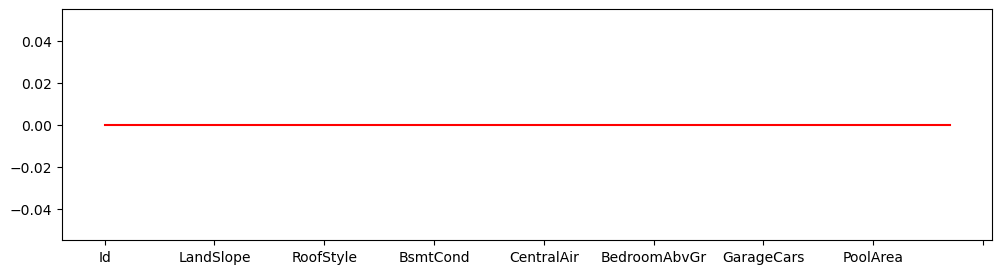

In [22]:
plt.figure(figsize=(12,3))
data3.isnull().sum().plot(color='r')

In [23]:
data3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,Unknown,0,12,2008,WD,Normal,250000


In [24]:
data3.Fence.value_counts()

Unknown    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64